# Data Preparation

We have data from three PhysioNet databases: MIT-BIH Arrhythmia Database, MIT-BIH Normal Sinus Rhythm Database, and The BIDMC Congestive Heart Failure Database.

The goal is to make a ECG dataset with the 3 classes equally represented

## Imports

In [1]:
import os
import wfdb

In [2]:
def count_unique_records(base_folder):
    unique_records = set()

    for folder_name in os.listdir(base_folder):
        folder_path = os.path.join(base_folder, folder_name)
        record_per_file = 0
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                if file_name.endswith('.hea'):
                    record_name = file_name.split('.hea')[0]
                    unique_records.add(record_name)
                    record_per_file+=1

        print(f'There are {record_per_file} records in the folder {folder_name}.')
    return len(unique_records)

# Path to your data folder
data_folder = 'data'

# Count the unique records
num_records = count_unique_records(data_folder)
print(f'Total number of unique records: {num_records}')


There are 84 records in the folder long-term-af.
There are 18 records in the folder mit-bih-normal-sinus-rhythm-database-1.0.0.
Total number of unique records: 102


In [3]:
NUMBER_OF_RECORDS_PER_FOLDER = 14
DATA_FOLDER = 'data'

In [4]:
for folder_name in os.listdir(data_folder):
        print(os.path.join(data_folder, folder_name))

CHF_PATH = 'data/bidmc-congestive-heart-failure-database-1.0.0'
ARRHYTMIA_PATH= 'data/mit-bih-arrhythmia-database-1.0.0'
NORMAL_PATH = 'data/mit-bih-normal-sinus-rhythm-database-1.0.0'

data\long-term-af
data\mit-bih-normal-sinus-rhythm-database-1.0.0


In [5]:
import os
import random
import wfdb

def get_random_record(folder_path):
    # # List all subfolders in the given folder
    # subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]
    
    # # Choose a random subfolder
    # random_subfolder = random.choice(subfolders)
    
    random_subfolder = folder_path
    # List all .hea files in the chosen subfolder
    hea_files = [f for f in os.listdir(random_subfolder) if f.endswith('.hea')]
    
    if not hea_files:
        raise FileNotFoundError(f"No .hea files found in {random_subfolder}")
    
    # Choose a random .hea file
    random_hea_file = random.choice(hea_files)
    
    # Construct the full path to the record
    record_name = os.path.splitext(random_hea_file)[0]
    record_path = os.path.join(random_subfolder, record_name)
    
    try:
        # Read the record
        record = wfdb.rdsamp(record_path)
        return record
    except Exception as e:
        print(f"Error reading {record_path}: {e}")
        return None

# Example usage
folder_path = 'data'
signals, fields = get_random_record(CHF_PATH)

if signals is not None:
    print(f"Random record signals shape: {signals.shape}")
else:
    print("Failed to read a random record.")


FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: 'data/bidmc-congestive-heart-failure-database-1.0.0'

In [ ]:
chf_record = get_random_record(CHF_PATH)
arrhytmia_record = get_random_record(ARRHYTMIA_PATH)
normal_record = get_random_record(NORMAL_PATH)

In [ ]:
chf_fs = chf_record[1]['fs']
print(chf_record[0].shape)
chf_record

(17796577, 2)


(array([[ 0.34 ,  0.245],
        [ 0.375,  0.325],
        [ 0.355,  0.355],
        ...,
        [-0.96 , -1.87 ],
        [-1.25 , -2.51 ],
        [-1.515, -3.15 ]]),
 {'fs': 250,
  'sig_len': 17796577,
  'n_sig': 2,
  'base_date': None,
  'base_time': datetime.time(8, 5),
  'units': ['mV', 'mV'],
  'sig_name': ['ECG1', 'ECG2'],
  'comments': ['Age: 63  Sex: F  NYHA class: III-IV']})

In [ ]:
arrhytmia_fs = arrhytmia_record[1]['fs']
print(arrhytmia_record[0].shape)
arrhytmia_record

(650000, 2)


(array([[-0.78 , -0.735],
        [-0.78 , -0.735],
        [-0.78 , -0.735],
        ...,
        [-1.02 , -0.58 ],
        [-1.04 , -0.585],
        [-1.28 ,  0.   ]]),
 {'fs': 360,
  'sig_len': 650000,
  'n_sig': 2,
  'base_date': None,
  'base_time': None,
  'units': ['mV', 'mV'],
  'sig_name': ['MLII', 'V1'],
  'comments': ['51 M 640 654 x2',
   'Digoxin, Lasix, Pronestyl',
   'The lower channel has low-amplitude high-frequency noise throughout.']})

In [ ]:
normal_fs = normal_record[1]['fs']
print(normal_record[0].shape)
normal_record

(11143168, 2)


(array([[ 0.165,  0.085],
        [ 0.155,  0.085],
        [ 0.155,  0.085],
        ...,
        [-0.05 , -0.09 ],
        [-0.05 , -0.09 ],
        [-0.05 , -0.09 ]]),
 {'fs': 128,
  'sig_len': 11143168,
  'n_sig': 2,
  'base_date': None,
  'base_time': datetime.time(13, 50),
  'units': ['mV', 'mV'],
  'sig_name': ['ECG1', 'ECG2'],
  'comments': ['45 M']})

In [ ]:
import matplotlib.pyplot as plt

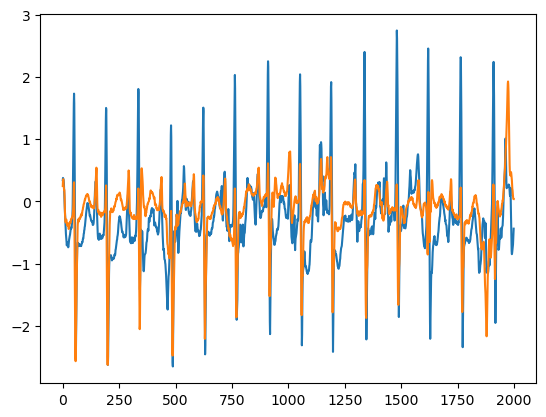

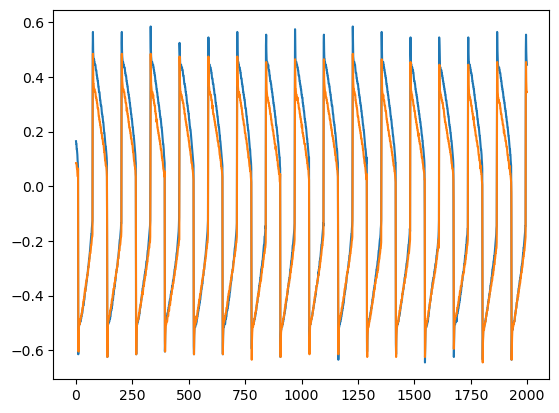

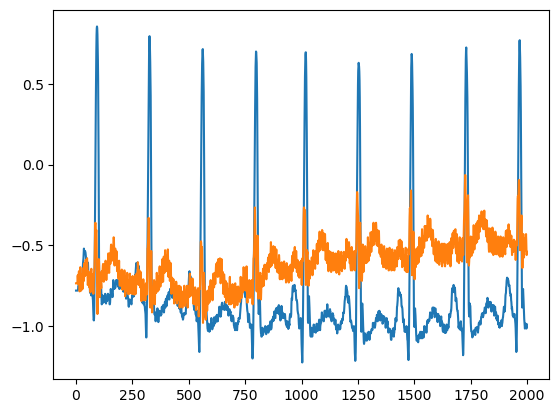

In [ ]:
plt.plot(chf_record[0][:2000])
plt.show()
plt.plot(normal_record[0][:2000])
plt.show()
plt.plot(arrhytmia_record[0][:2000]);

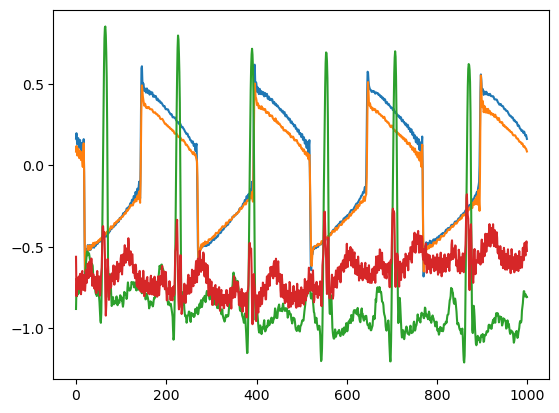

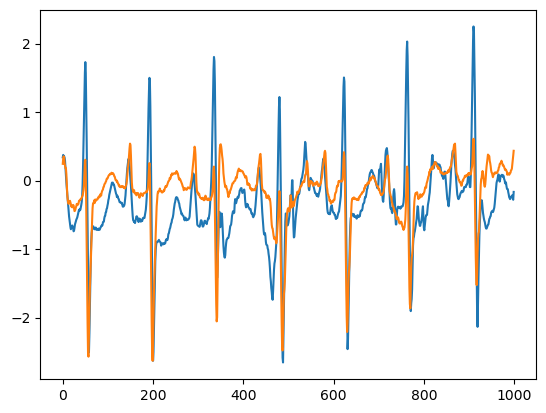

In [ ]:
from scipy import signal

# Example of resampling
def resample_signal(record, original_fs, target_fs):
    resampled_signal = signal.resample(record, int(len(record) * (target_fs / original_fs)))
    return resampled_signal, target_fs

normal_record, normal_fs
arrhytmia_record, arrhytmia_fs
chf_record, chf_fs

# Usage
resampled_signal, target_fs = resample_signal(normal_record[0], normal_fs, chf_fs)

resampled_signal1, target_fs = resample_signal(arrhytmia_record[0], arrhytmia_fs, chf_fs)
plt.plot(resampled_signal[:1000])
plt.plot(resampled_signal1[:1000])
plt.show()
plt.plot(chf_record[0][:1000])

In [ ]:
resampled_signal1

array([[-0.88195517, -0.56136603],
       [-0.74211716, -0.80311093],
       [-0.80294432, -0.69311409],
       ...,
       [-1.05619792, -0.46524214],
       [-0.98616552, -0.66928301],
       [-1.19547657, -0.22898161]])

In [ ]:
import os
import wfdb
import numpy as np

def read_ecg_signals(folder_path):
    signals_list = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith('.hea'):
            record_name = file_name.split('.hea')[0]
            record_path = os.path.join(folder_path, record_name)
            
            try:
                # Read the record
                record = wfdb.rdsamp(record_path)
                # print(record)
                # Extract the signals
                signals, fields = record[0], record[1]['fs']
                print(signals.shape)
                # Append the signals to the list
                signals_list.append(signals)
            except Exception as e:
                print(f"Error reading {record_path}: {e}")

    # Convert list of signals to a 3D numpy array
    # for signal in signals_list:
    #     print(signal.shape)
    if False and signals_list:
        signals_array = np.stack(signals_list, axis=0)
        return signals_array
    else:
        return np.array([])

# # Path to your data folder
# data_folder = 'data'

# # Read the ECG signals
# ecg_signals_array = read_ecg_signals(data_folder)
# print(f'Shape of ECG signals array: {ecg_signals_array.shape}')

read_ecg_signals(CHF_PATH)


(17994491, 2)
(17793024, 2)
(17998848, 2)
(17998848, 2)
(17802240, 2)
(17789952, 2)
(17998848, 2)
(17998848, 2)
(17796577, 2)
(17995711, 2)
(17998848, 2)
(17842176, 2)
(17996694, 2)
(17998848, 2)
(17993443, 2)


array([], dtype=float64)

- 

In [ ]:
base_folder = 'data'

In [ ]:
for folder_name in os.listdir(base_folder):
        folder_path = os.path.join(base_folder, folder_name)
        record_per_file = 0
        if os.path.isdir(folder_path):
                print(folder_path)
                read_ecg_signals(folder_path)

data\bidmc-congestive-heart-failure-database-1.0.0
(17994491, 2)
(17793024, 2)
(17998848, 2)
(17998848, 2)
(17802240, 2)
(17789952, 2)
(17998848, 2)
(17998848, 2)
(17796577, 2)
(17995711, 2)
(17998848, 2)
(17842176, 2)
(17996694, 2)
(17998848, 2)
(17993443, 2)
data\mit-bih-arrhythmia-database-1.0.0
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
(650000, 2)
data\mit-bih-normal-sinus-rhythm-database-1.0.0
(11730944, 2)
(11520000, 2)
(11354112, 2)
(11051008, 2)
(11960320, 2)
(11327

In [ ]:
def resample_signal(record, original_fs, target_fs):
    if original_fs != target_fs:
        resampled_signal = signal.resample(record, int(len(record) * (target_fs / original_fs)))
        return resampled_signal
    return record

In [ ]:
def reshape_to_batches(array, m):
    """
    Transform an array of shape (n, p) into a list of n//m arrays of shape (m, p).

    Parameters:
    array (numpy.ndarray): The input array of shape (n, p).
    m (int): The number of rows for each smaller array.

    Returns:
    list: A list of arrays, each of shape (m, p).
    """
    # Ensure the input is a numpy array
    array = np.asarray(array)
    
    # Get the shape of the input array
    n, p = array.shape
    
    # Calculate the number of batches
    num_batches = n // m
    
    # Initialize the list to store the batches
    batches = []
    
    # Loop through and extract the batches
    for i in range(num_batches):
        start_idx = i * m
        end_idx = start_idx + m
        batch = array[start_idx:end_idx, :]
        batches.append(batch)
    
    return batches

In [ ]:
def prepare_data(base_folder, target_fs = 250 ):
    
    signals_dict = dict()
    for folder_name in os.listdir(base_folder):
        folder_path = os.path.join(base_folder, folder_name)
        record_per_file = 0
        if os.path.isdir(folder_path):
            signals_list = list()
            print(folder_name)
            for file_name in os.listdir(folder_path):
                if file_name.endswith('.hea'):
                    record_name = file_name.split('.hea')[0]
                    record_path = os.path.join(folder_path, record_name)
            
                    try:
                        # Read the record
                        record = wfdb.rdsamp(record_path)
                        # print(record)
                        # Extract the signals
                        signals, fs = record[0], record[1]['fs']

                        resampled_signal =  resample_signal(signals,fs,target_fs)

                        # Append the signals to the list
                        batches =  reshape_to_batches(resampled_signal,65000)
                        # signals_list.append(resampled_signal)
                        signals_list.extend(batches)
                        # print(signals.shape)
                    except Exception as e:
                        print(f"Error reading {record_path}: {e}")

        print(folder_name[:10])
        for signal in signals_list:
            print(signal.shape)
        signals_dict[folder_name[:10]] = signals_list
        print(f'There are {len(signals_list)} signals for the folder {folder_name}.')
    return signals_dict

In [ ]:
import os
import wfdb
import numpy as np
import random

# def resample_signal(signal, original_fs, target_fs):
#     """
#     Resample the signal to the target sampling frequency.
#     """
#     duration = signal.shape[0] / original_fs
#     num_samples = int(duration * target_fs)
#     resampled_signal = np.zeros((num_samples, signal.shape[1]))

#     for i in range(signal.shape[1]):
#         resampled_signal[:, i] = np.interp(
#             np.linspace(0.0, duration, num_samples),
#             np.linspace(0.0, duration, signal.shape[0]),
#             signal[:, i]
#         )
    
#     return resampled_signal

def reshape_to_batches(array, m):
    """
    Transform an array of shape (n, p) into a list of arrays of shape (m, p).
    """
    # Ensure the input is a numpy array
    array = np.asarray(array)
    
    # Get the shape of the input array
    n, p = array.shape
    
    # Calculate the number of batches
    num_batches = n // m
    
    # Initialize the list to store the batches
    batches = []
    
    # Loop through and extract the batches
    for i in range(num_batches):
        start_idx = i * m
        end_idx = start_idx + m
        batch = array[start_idx:end_idx, :]
        batches.append(batch)
    
    return batches

def prepare_data(base_folder, target_fs=250, limit_signals_per_folder=10):
    signals_dict = dict()
    for folder_name in os.listdir(base_folder):
        folder_path = os.path.join(base_folder, folder_name)
        record_per_file = 0
        if os.path.isdir(folder_path):
            signals_list = list()
            print(folder_name)
            
            # Get all .hea files in the folder and shuffle the list
            file_names = [f for f in os.listdir(folder_path) if f.endswith('.hea')]
            random.shuffle(file_names)
            
            for file_name in file_names:
                if len(signals_list) >= limit_signals_per_folder:
                    break
                
                record_name = file_name.split('.hea')[0]
                record_path = os.path.join(folder_path, record_name)
        
                try:
                    # Read the record
                    record = wfdb.rdsamp(record_path)
                    # print(record)
                    # Extract the signals
                    signals, fs = record[0], record[1]['fs']

                    resampled_signal = resample_signal(signals, fs, target_fs)

                    # Append the signals to the list
                    batches = reshape_to_batches(resampled_signal, 65000)
                    signals_list.extend(batches)
                    # print(signals.shape)
                except Exception as e:
                    print(f"Error reading {record_path}: {e}")

            print(folder_name[:10])
            for signal in signals_list:
                print(signal.shape)
            signals_dict[folder_name[:10]] = signals_list
            print(f'There are {len(signals_list)} signals for the folder {folder_name}.')
    
    return signals_dict

# Example usage
data_folder = 'data'
signals_dict = prepare_data(data_folder, target_fs=250, limit_signals_per_folder=5)

# Output the number of signals per folder
for folder, signals in signals_dict.items():
    print(f'Folder {folder} has {len(signals)} signals.')


bidmc-congestive-heart-failure-database-1.0.0
bidmc-cong
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 2)
(65000, 

In [ ]:
import os
import wfdb
import numpy as np
import random

# def resample_signal(signal, original_fs, target_fs):
#     """
#     Resample the signal to the target sampling frequency.
#     """
#     duration = signal.shape[0] / original_fs
#     num_samples = int(duration * target_fs)
#     resampled_signal = np.zeros((num_samples, signal.shape[1]))

#     for i in range(signal.shape[1]):
#         resampled_signal[:, i] = np.interp(
#             np.linspace(0.0, duration, num_samples),
#             np.linspace(0.0, duration, signal.shape[0]),
#             signal[:, i]
#         )
    
#     return resampled_signal

def reshape_to_batches(array, m):
    """
    Transform an array of shape (n, p) into a list of arrays of shape (m, p).
    """
    array = np.asarray(array)
    n, p = array.shape
    num_batches = n // m
    return [array[i * m:(i + 1) * m, :] for i in range(num_batches)]

def prepare_data(base_folder, target_fs=250, limit_signals_per_folder=30, batch_size=65000):
    signals_dict = {}
    for folder_name in os.listdir(base_folder):
        folder_path = os.path.join(base_folder, folder_name)
        if not os.path.isdir(folder_path):
            continue

        signals_list = []
        print(f"Processing folder: {folder_name}")
        file_names = [f for f in os.listdir(folder_path) if f.endswith('.hea')]
        random.shuffle(file_names)

        for file_name in file_names:
            if len(signals_list) >= limit_signals_per_folder:
                break

            record_name = file_name.split('.hea')[0]
            record_path = os.path.join(folder_path, record_name)

            # try:
            # Read the record
            record = wfdb.rdsamp(record_path)
            signals, fs = record[0][:,0][:,None], record[1]['fs']
            print(signals.shape)
            resampled_signal = resample_signal(signals, fs, target_fs)
            batches = reshape_to_batches(resampled_signal, batch_size)
            signals_list.extend(batches)
            # except Exception as e:
            #     print(f"Error reading {record_path}: {e}")

        signals_dict[folder_name[:10]] = signals_list
        print(f'There are {len(signals_list)} signals for the folder {folder_name}.')

    return signals_dict



In [ ]:
signals_dict = prepare_data('data', limit_signals_per_folder=1000)

Processing folder: bidmc-congestive-heart-failure-database-1.0.0
(17998848, 1)
(17995711, 1)
(17998848, 1)
(17998848, 1)
There are 1104 signals for the folder bidmc-congestive-heart-failure-database-1.0.0.
Processing folder: mit-bih-arrhythmia-database-1.0.0
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
(650000, 1)
There are 288 signals for the folder mit-bih-arrhythmia-database-1.0.0.
Processing folder: mit-bih-normal-sinus-rhythm-database-1.0.0
(11960320, 1)
(11235328, 1)
(10

In [ ]:
for key,value in signals_dict.items():
    print( key, f" {len(value)} signals")


bidmc-cong  1104 signals
mit-bih-ar  288 signals
mit-bih-no  1025 signals


bidmc-cong
(65000, 1)


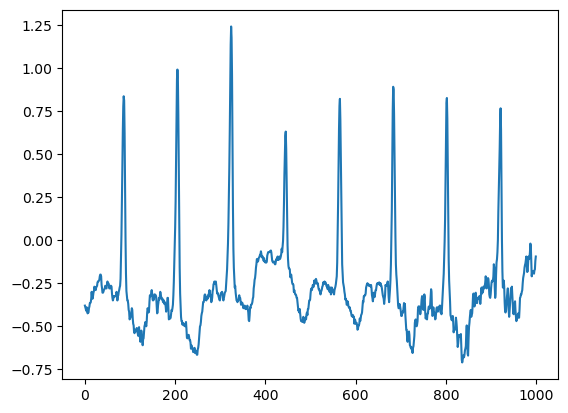

mit-bih-ar
(65000, 1)


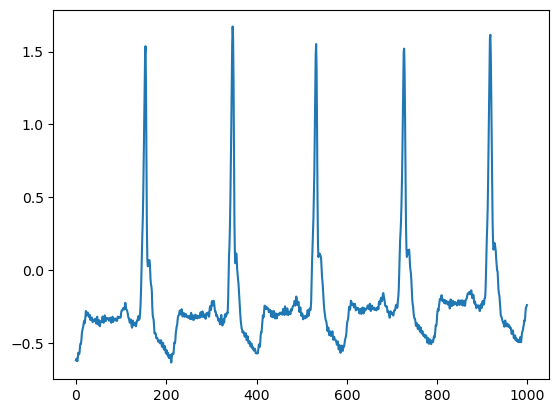

mit-bih-no
(65000, 1)


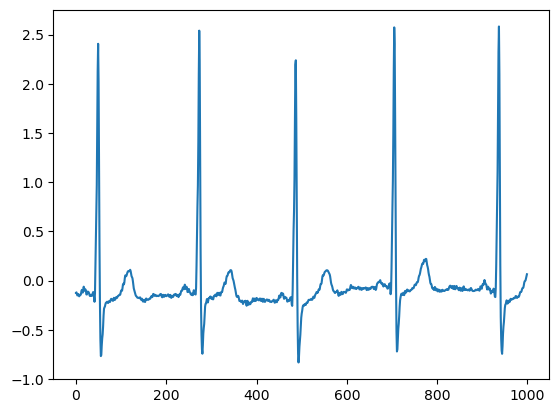

In [ ]:
for key,value in signals_dict.items():
    print( key)
    signal_ = value[np.random.randint(len(value))]
    print(signal_.shape)
    plt.plot(signal_[:1000])
    plt.show()

In [ ]:
import random

def select_n_elements(input_list, n):
    """
    Select n unique elements from the input_list.

    Parameters:
    input_list (list): The list from which to select elements.
    n (int): The number of unique elements to select.

    Returns:
    list: A list containing n unique elements from the input_list.
    """
    if n > len(input_list):
        raise ValueError("n cannot be greater than the length of the input list.")
    return random.sample(input_list, n)

# # Example usage
# input_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# n = 10

# selected_elements = select_n_elements(input_list, n)
# print(f"Selected {n} elements: {selected_elements}")


In [ ]:
final_data = {}
for key, value in signals_dict.items():
    final_data[key] = select_n_elements(value,n=280)

In [ ]:
import h5py
import numpy as np

def save_dict_to_hdf5(filename, data_dict):
    """
    Save a dictionary of lists of arrays to an HDF5 file.

    Parameters:
    filename (str): The name of the HDF5 file to save the data.
    data_dict (dict): The dictionary containing lists of arrays.
    """
    with h5py.File(filename, 'w') as hdf5_file:
        for key, value_list in data_dict.items():
            grp = hdf5_file.create_group(key)
            for i, array in enumerate(value_list):
                grp.create_dataset(f'array_{i}', data=array)

# Example usage
# data_dict = {
#     'folder1': [np.random.rand(5, 3), np.random.rand(4, 3)],
#     'folder2': [np.random.rand(6, 3)]
# }

save_dict_to_hdf5('final_data.h5', final_data)


In [ ]:
import json

In [ ]:
import numpy as np

def reshape_to_batches(array, m):
    """
    Transform an array of shape (n, p) into a list of n//m arrays of shape (m, p).

    Parameters:
    array (numpy.ndarray): The input array of shape (n, p).
    m (int): The number of rows for each smaller array.

    Returns:
    list: A list of arrays, each of shape (m, p).
    """
    # Ensure the input is a numpy array
    array = np.asarray(array)
    
    # Get the shape of the input array
    n, p = array.shape
    
    # Calculate the number of batches
    num_batches = n // m
    
    # Initialize the list to store the batches
    batches = []
    
    # Loop through and extract the batches
    for i in range(num_batches):
        start_idx = i * m
        end_idx = start_idx + m
        batch = array[start_idx:end_idx, :]
        batches.append(batch)
    
    return batches




In [ ]:
def reshape_to_batches(array, m):
    """
    Transform an array of shape (n, p) into a list of arrays of shape (m, p).
    """
    array = np.asarray(array)
    n, p = array.shape
    num_batches = n // m
    return [array[i * m:(i + 1) * m, :] for i in range(num_batches)]

In [ ]:
def prepare_data(base_folder, target_fs=250, limit_signals_per_folder=30, batch_size=65000):
    signals_dict = {}
    for folder_name in os.listdir(base_folder):
        folder_path = os.path.join(base_folder, folder_name)
        if not os.path.isdir(folder_path):
            continue

        signals_list = []
        print(f"Processing folder: {folder_name}")
        file_names = [f for f in os.listdir(folder_path) if f.endswith('.hea')]
        random.shuffle(file_names)

        for file_name in file_names:
            if len(signals_list) >= limit_signals_per_folder:
                break

            record_name = file_name.split('.hea')[0]
            record_path = os.path.join(folder_path, record_name)

            # try:
            # Read the record
            record = wfdb.rdsamp(record_path)
            signals, fs = record[0][:,0][:,None], record[1]['fs']
            print(signals.shape)
            resampled_signal = resample_signal(signals, fs, target_fs)
            batches = reshape_to_batches(resampled_signal, batch_size)
            signals_list.extend(batches)
            # except Exception as e:
            #     print(f"Error reading {record_path}: {e}")

        signals_dict[folder_name[:10]] = signals_list
        print(f'There are {len(signals_list)} signals for the folder {folder_name}.')

    return signals_dict


In [ ]:
def read_ecg_signals(folder_path, target_fs=250, limit_signals_per_folder=30, batch_size=65000):
    signals_list = []
    label_list = []
    label = -1
    
    for folder_name in os.listdir(base_folder):
        folder_path = os.path.join(base_folder, folder_name)
        label += 1
        # print(label)
        count_signals = 0
        file_names = [f for f in os.listdir(folder_path) if f.endswith('.hea')]
        random.shuffle(file_names)
        for file_name in file_names:
            if file_name.endswith('.hea'):
                record_name = file_name.split('.hea')[0]
                record_path = os.path.join(folder_path, record_name)
                try:
                    # Read the record
                    if count_signals  >= limit_signals_per_folder:
                        break
                    record = wfdb.rdsamp(record_path)
                    signals, fs = record[0][:,0][:,None], record[1]['fs']
                    # print(signals.shape)
                    resampled_signal = resample_signal(signals, fs, target_fs)
                    batches = reshape_to_batches(resampled_signal, batch_size)
                    signals_list.extend(batches)
                    label_list.extend([label] * len(batches))
                    count_signals += len(batches)
                except Exception as e:
                    print(f"Error reading {record_path}: {e}")

    # Convert list of signals to a 3D numpy array
    # for signal in signals_list:
    #     print(signal.shape)
    if signals_list:
        signals_array = np.stack(signals_list, axis=0).squeeze()
        signals_array = np.concatenate([signals_array,np.array(label_list)[:,None]],axis=1)
        print(f'Data shape: {signals_array.shape}, fs: {target_fs}')
        return signals_array
    else:
        return np.array([])

In [ ]:
ecgs_labels = read_ecg_signals('data',limit_signals_per_folder=280)

Data shape: (1163, 65001), fs: 250


In [ ]:
np.save('ecgs_labels',ecgs_labels)

In [ ]:
np.unique(ecgs_labels[:,-1],return_counts=True)

(array([0., 1., 2.]), array([552, 282, 331], dtype=int64))